In [1]:
import numpy as np
import pandas as pd



## **Read the data**

In [2]:
df = pd.read_csv('./data/winequalityN.csv')

In [3]:
df.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

<font size="4">Few columns have missing values, the columns "fixed acidity" has the highest number of missing values</font>

## **Replace missing values**

<font size="4">We will replace the missing the values with the column mean</font>

In [4]:
missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]

In [5]:
for col in missing_val_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)
    

In [6]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<font size="4">Now, there are no more missing values</font>

## **Data exploration**

In [7]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<font size="4">We have an unbalanced dataset, more number of white wine than red </font>

In [8]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<font size="4">The dataset is unbalanced with respect to the wine quality as well.</font>

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


<font size="4">Rename the column ```type_white``` to ```wine_type```</font>

In [11]:
df = df.rename(columns={"type_white": "wine_type"})

<font size="4">Since, we had an unbalanced dataset with respect to wine quality, we divide the qualities into two  groups - 1 (for wine quality 7, 8, 9) and 0 (for 6 and below)</font>

In [12]:
df["wine_quality"] = [1 if x>6 else 0 for x in df.quality]

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


<font size="4">Store the label in ```y```</font>

In [14]:
y = df["wine_quality"]

In [15]:
y.value_counts()

0    5220
1    1277
Name: wine_quality, dtype: int64

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine_quality, Length: 6497, dtype: int64

<font size="4">Store the feature columns in ```x```</font>

In [17]:
x = df.drop(["quality", "wine_quality"], axis=1)

In [18]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


## **Model Training**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
log = pd.DataFrame(columns=["model", "accuracy", "enhanced_data"])
log['enhanced_data'] = log['enhanced_data'].astype(bool)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
from enhance_data import enhance_data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


transformer = ColumnTransformer([
    ('onehotencode categories', OneHotEncoder(), ['wine_type']),
    ('nor normally distributed', MinMaxScaler(), ['fixed acidity',
                                                  'volatile acidity',
                                                  'citric acid',
                                                  'residual sugar',
                                                  'chlorides',
                                                  'free sulfur dioxide',
                                                  'total sulfur dioxide',
                                                  'density',
                                                  'pH',
                                                  'sulphates',
                                                  'alcohol'])], 
    remainder='drop')
    
# chain transformer and imputation
pipeline = Pipeline([('transform', transformer)])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

#y_train = y_train.values


fitting new wasserstein generator on smaller data
Epoch   1 | ET 0.07 min | Avg Losses >> G/D   0.07/164.66 [D-Real:  -0.29 D-Fake:  -0.07]
Epoch   2 | ET 0.14 min | Avg Losses >> G/D   0.03/ 16.07 [D-Real:   0.01 D-Fake:  -0.03]
Epoch   3 | ET 0.23 min | Avg Losses >> G/D  -0.04/ 12.88 [D-Real:  -0.00 D-Fake:   0.04]
Epoch   4 | ET 0.32 min | Avg Losses >> G/D  -0.08/ 10.37 [D-Real:  -0.04 D-Fake:   0.08]
Epoch   5 | ET 0.41 min | Avg Losses >> G/D  -0.13/  8.17 [D-Real:  -0.08 D-Fake:   0.13]
Epoch   6 | ET 0.48 min | Avg Losses >> G/D  -0.16/  6.19 [D-Real:  -0.09 D-Fake:   0.16]
Epoch   7 | ET 0.55 min | Avg Losses >> G/D  -0.18/  4.73 [D-Real:  -0.09 D-Fake:   0.18]
Epoch   8 | ET 0.62 min | Avg Losses >> G/D  -0.16/  3.54 [D-Real:  -0.10 D-Fake:   0.16]
Epoch   9 | ET 0.68 min | Avg Losses >> G/D  -0.17/  2.61 [D-Real:  -0.11 D-Fake:   0.17]
Epoch  10 | ET 0.74 min | Avg Losses >> G/D  -0.17/  1.86 [D-Real:  -0.08 D-Fake:   0.17]
Epoch  11 | ET 0.80 min | Avg Losses >> G/D  -0.1

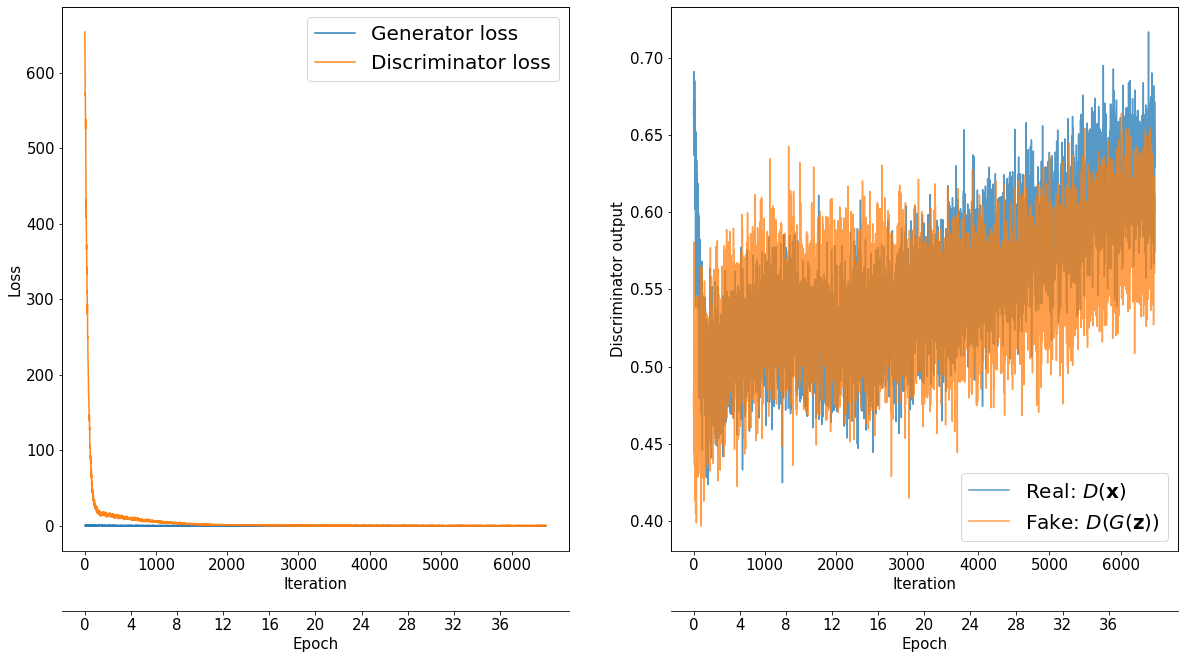

In [23]:
enh = enhance_data(X_train, y_train, 
                   force_generator=True, 
                   synthetic_share=1., 
                   wasserstein=True,
                   replace_real_data=True)

<font size="4">**Logistic Regeression**</font>

In [24]:
clf = LogisticRegression(solver='liblinear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[983,  64],
       [172,  81]])

# logreg with enhanced data

In [25]:
log = log.append({"model": "logistic regression", "accuracy": score, "enhanced_data": False}, ignore_index=True)

In [26]:
clf = LogisticRegression(solver='liblinear')

clf.fit(enh['x_train_processed'], enh['y_train'])

y_pred = clf.predict(X_test)

clf.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[269, 778],
       [ 14, 239]])

In [27]:
log = log.append({"model": "logistic regression", "accuracy": score, "enhanced_data": True}, ignore_index=True)

<font size="4">**C-support Vector Classification**</font>

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC(kernel="rbf",C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)

In [30]:
log = log.append({"model": "SVC", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# svc with enhanced data

In [31]:
model = SVC(kernel="rbf",C=1)

model.fit(enh['x_train_processed'], enh['y_train'])

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)

In [32]:
log = log.append({"model": "SVC", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [33]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.390769,True
2,SVC,0.821538,False
3,SVC,0.395385,True


<font size="4">**Random Forest Classifier**</font>

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Random Forest", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# RF with enhanced data

In [36]:
clf = RandomForestClassifier(random_state = 1)
clf.fit(enh['x_train_processed'], enh['y_train'])
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Random Forest", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [37]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.390769,True
2,SVC,0.821538,False
3,SVC,0.395385,True
4,Random Forest,0.817692,False
5,Random Forest,0.382308,True


<font size="4">**Decision Tree Classifier**</font>

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Decision tree", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# decision tree with enhanced data

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(enh['x_train_processed'], enh['y_train'])
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Decision tree", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [40]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.390769,True
2,SVC,0.821538,False
3,SVC,0.395385,True
4,Random Forest,0.817692,False
5,Random Forest,0.382308,True
6,Decision tree,0.768462,False
7,Decision tree,0.296154,True


<font size="4">**K nearest neighbour**</font>

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "K nearest neighbours", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# knn with enhanced data

In [43]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(enh['x_train_processed'], enh['y_train'])
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "K nearest neighbours", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [44]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.390769,True
2,SVC,0.821538,False
3,SVC,0.395385,True
4,Random Forest,0.817692,False
5,Random Forest,0.382308,True
6,Decision tree,0.768462,False
7,Decision tree,0.296154,True
8,K nearest neighbours,0.802308,False
9,K nearest neighbours,0.396923,True


<font size="4">**Gaussian Naive Bayes**</font>

In [45]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "GaussianNB", "accuracy": score, "enhanced_data": False}, ignore_index=True)

# naive bayes with enhanced data

In [46]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(enh['x_train_processed'], enh['y_train'])
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "GaussianNB", "accuracy": score, "enhanced_data": True}, ignore_index=True)

In [47]:
log

,model,accuracy,enhanced_data
0,logistic regression,0.818462,False
1,logistic regression,0.390769,True
2,SVC,0.821538,False
3,SVC,0.395385,True
4,Random Forest,0.817692,False
5,Random Forest,0.382308,True
6,Decision tree,0.768462,False
7,Decision tree,0.296154,True
8,K nearest neighbours,0.802308,False
9,K nearest neighbours,0.396923,True


# neuralnet

In [48]:
from tensorflow.keras import models, Model, layers
from tensorflow.keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.InputLayer(input_shape=X_train.shape[1:]))

for i in range(5):
        model.add(layers.Dense(
            64, 
            kernel_initializer='he_normal',
            name=f'hidden_layer_{i}'))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('selu'))
        model.add(layers.Dropout(0.3, name=f'dropout_{i}_30'))
    
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0 (Dense)       (None, 64)                896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_0_30 (Dropout)       (None, 64)                0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_6 (Activation)    (None, 64)               

In [49]:
history = model.fit(
    X_train, y_train, validation_split=.2, epochs=300,
    callbacks=[
        EarlyStopping(patience=20, monitor='val_accuracy', mode='max', restore_best_weights=True)])

Epoch 1/300
130/130 [==============================] - 3s 11ms/step - loss: 0.6534 - accuracy: 0.6534 - val_loss: 0.4564 - val_accuracy: 0.7962
Epoch 2/300
130/130 [==============================] - 2s 14ms/step - loss: 0.5078 - accuracy: 0.7655 - val_loss: 0.4213 - val_accuracy: 0.7942
Epoch 3/300
130/130 [==============================] - 2s 13ms/step - loss: 0.4668 - accuracy: 0.7907 - val_loss: 0.4106 - val_accuracy: 0.8038
Epoch 4/300
130/130 [==============================] - 2s 12ms/step - loss: 0.4518 - accuracy: 0.7965 - val_loss: 0.4025 - val_accuracy: 0.8135
Epoch 5/300
130/130 [==============================] - 3s 21ms/step - loss: 0.4470 - accuracy: 0.7960 - val_loss: 0.4039 - val_accuracy: 0.8125
Epoch 6/300
130/130 [==============================] - 1s 8ms/step - loss: 0.4456 - accuracy: 0.7958 - val_loss: 0.3994 - val_accuracy: 0.8067
Epoch 7/300
130/130 [==============================] - 2s 12ms/step - loss: 0.4433 - accuracy: 0.7970 - val_loss: 0.4128 - val_accuracy: 

In [50]:
result = model.evaluate(X_test, y_test)
result[1]

41/41 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8192


0.8192307949066162

In [51]:
log = log.append({"model": "DenseNeuralNet", "accuracy": result[1], "enhanced_data": False}, ignore_index=True)

# neuralnet with enhanced data

In [52]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=X_train.shape[1:]))

for i in range(5):
        model.add(layers.Dense(
            64, 
            kernel_initializer='he_normal',
            name=f'hidden_layer_{i}'))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('selu'))
        model.add(layers.Dropout(0.3, name=f'dropout_{i}_30'))
    
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [53]:
history = model.fit(
    enh['x_train_processed'], enh['y_train'], validation_split=.2, epochs=300,
    callbacks=[
        EarlyStopping(patience=20, monitor='val_accuracy', mode='max', restore_best_weights=True)])

Epoch 1/300
130/130 [==============================] - 5s 25ms/step - loss: 0.3459 - accuracy: 0.8516 - val_loss: 0.1635 - val_accuracy: 0.9279
Epoch 2/300
130/130 [==============================] - 2s 16ms/step - loss: 0.2513 - accuracy: 0.8930 - val_loss: 0.1253 - val_accuracy: 0.9519
Epoch 3/300
130/130 [==============================] - 3s 19ms/step - loss: 0.2187 - accuracy: 0.9086 - val_loss: 0.1041 - val_accuracy: 0.9606
Epoch 4/300
130/130 [==============================] - 4s 30ms/step - loss: 0.2022 - accuracy: 0.9148 - val_loss: 0.1063 - val_accuracy: 0.9615
Epoch 5/300
130/130 [==============================] - 3s 23ms/step - loss: 0.2048 - accuracy: 0.9156 - val_loss: 0.1037 - val_accuracy: 0.9587
Epoch 6/300
130/130 [==============================] - 3s 20ms/step - loss: 0.2065 - accuracy: 0.9124 - val_loss: 0.1031 - val_accuracy: 0.9654
Epoch 7/300
130/130 [==============================] - 3s 21ms/step - loss: 0.1947 - accuracy: 0.9175 - val_loss: 0.0996 - val_accuracy:

In [54]:
result = model.evaluate(X_test, y_test)
result[1]

41/41 [==============================] - 0s 6ms/step - loss: 2.3711 - accuracy: 0.4277


0.4276922941207886

In [55]:
log = log.append({"model": "DenseNeuralNet", "accuracy": result[1], "enhanced_data": True}, ignore_index=True)

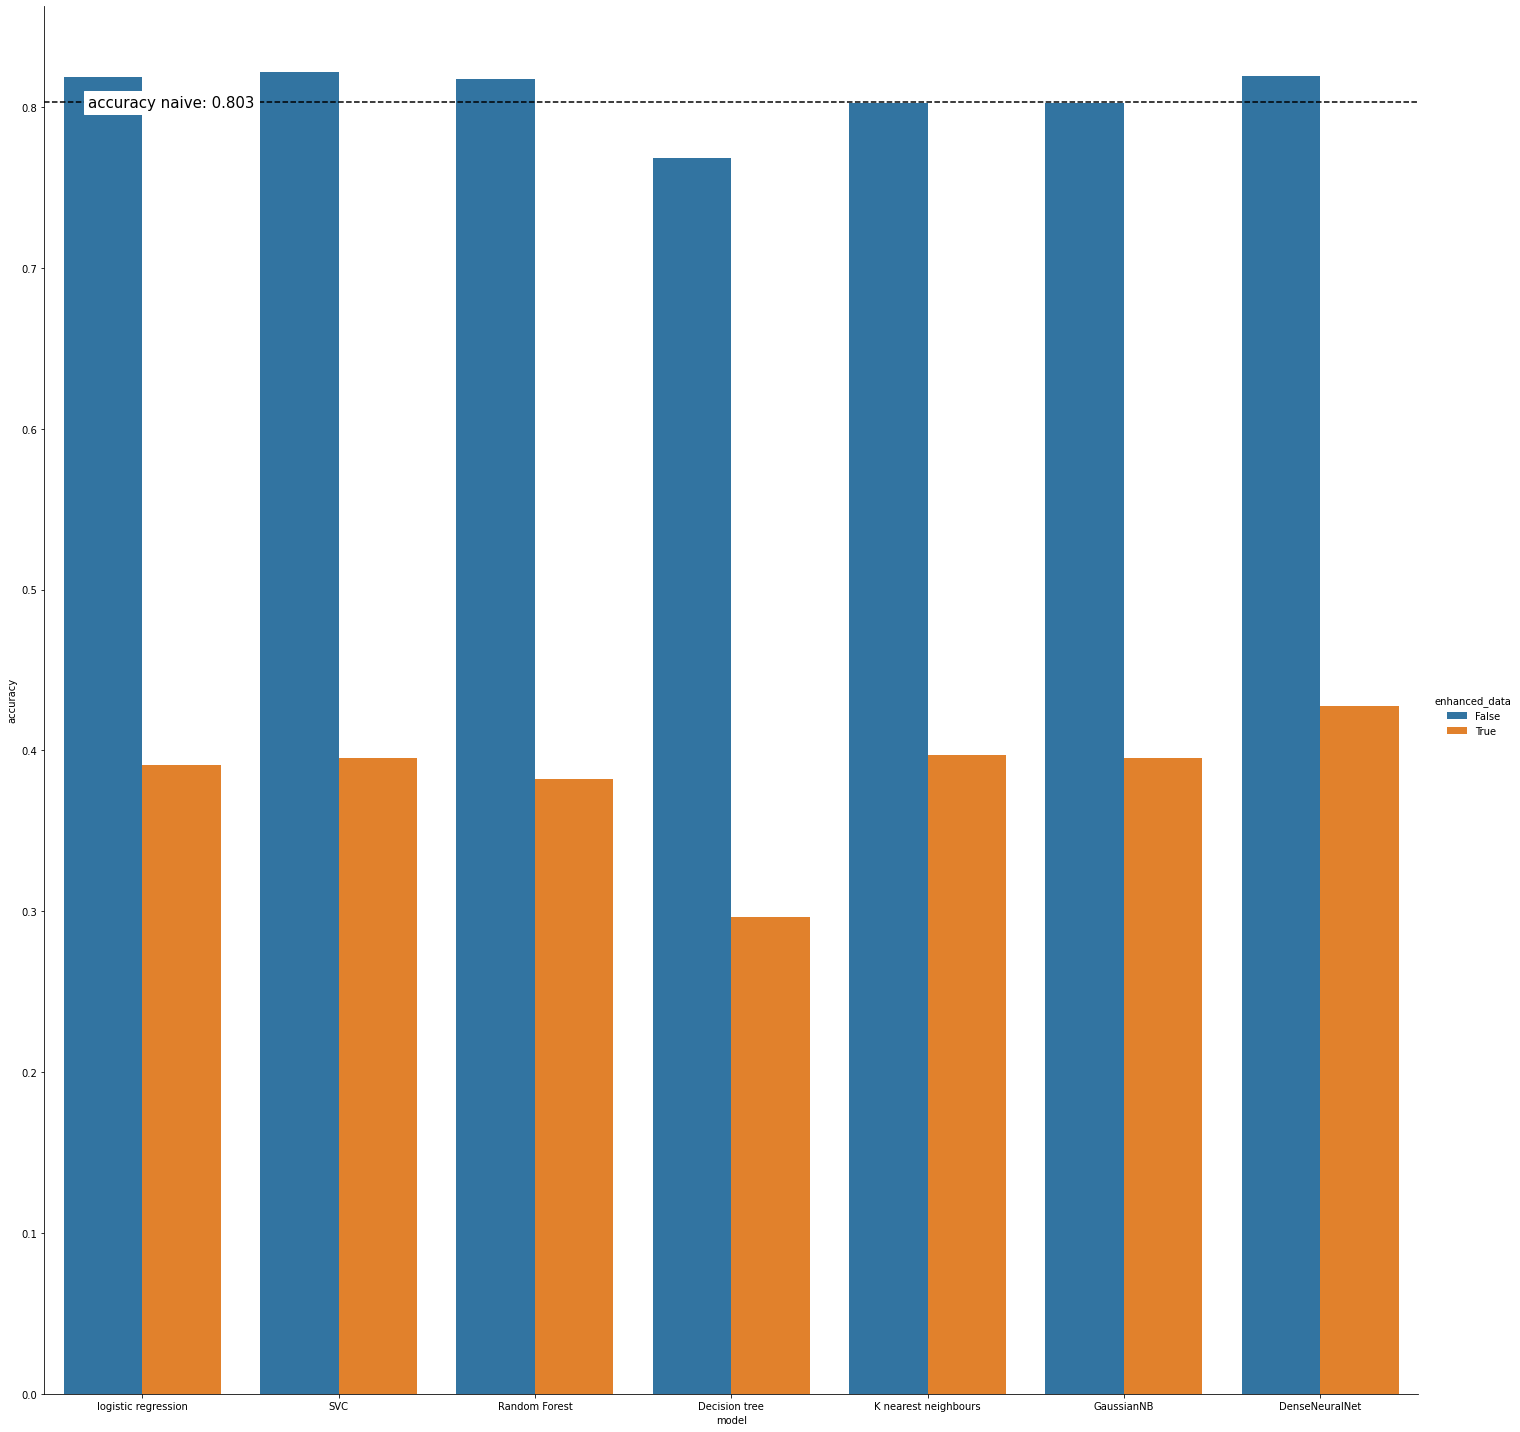

In [56]:
import seaborn as sns
from matplotlib import pyplot as plt


c = sns.catplot(
    data=log,
    x='model',
    y='accuracy',
    hue='enhanced_data',
    kind='bar',
    height=20
)

naive_baseline = 1 - y_train.mean()

axes = c.axes.flatten()
for i, ax in enumerate(axes):
    accuracy = naive_baseline
    
    ax.axhline(accuracy, ls='--', c='black')
    ax.text(0.15, accuracy, 
            f'accuracy naive: {round(accuracy, 4)}', 
            fontsize=15, va='center', ha='center', backgroundcolor='w')


plt.savefig('./winequality_replacing_experiments.jpg')